In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
from matplotlib.offsetbox import AnchoredText
from collections import defaultdict

In [2]:
combo_df = pd.read_csv("combined.csv")

In [3]:
combo_df[combo_df["token"] == "の"] #kuromoji counts it as a noun sometimes

,token,pos,frequency
0,の,助詞,98295
12,の,名詞,16715


In [4]:
combo_df.head(1)

,token,pos,frequency
0,の,助詞,98295


In [5]:
combo_df.sort_values(by="frequency",ascending=False)

,token,pos,frequency
0,の,助詞,98295
1,に,助詞,73464
2,は,助詞,65469
3,て,助詞,62822
4,を,助詞,59289
...,...,...,...
35666,化繊,名詞,1
35667,議題,名詞,1
35668,描出,名詞,1
35669,おしおき,名詞,1


In [6]:
combo_pos_df = combo_df.groupby(['pos']).sum()

In [7]:
combo_pos_df.reset_index(inplace=True)

In [8]:
combo_pos_df.head()

,pos,frequency
0,その他,30
1,フィラー,4266
2,副詞,48759
3,助動詞,188008
4,助詞,582386


In [9]:
combo_pos_df["Relative Frequency"] = combo_pos_df["frequency"] * 100 / combo_pos_df["frequency"].sum()

In [10]:
combo_pos_df.head(2)

,pos,frequency,Relative Frequency
0,その他,30,0.001633
1,フィラー,4266,0.232150


In [11]:
combo_pos_df.sort_values(by="Relative Frequency",ascending = False,inplace=True)

In [12]:
combo_pos_df.head(2)

,pos,frequency,Relative Frequency
6,名詞,645826,35.145023
4,助詞,582386,31.692700


In [13]:
pos_types = list(combo_df["pos"].unique()) #13 total
pos_types

['助詞',
 '助動詞',
 '動詞',
 '名詞',
 '連体詞',
 '形容詞',
 '接頭詞',
 '接続詞',
 '副詞',
 'フィラー',
 '感動詞',
 '記号',
 'その他']

In [14]:
K_PATTERN = r"([一-龯].*)" #r"([一-龯]+)"
test = "あいうえお難しい"
if re.findall(K_PATTERN, test):
    print('yep')

yep


In [15]:
def regex_filter(val,regex):
    if val:
        mo = re.search(regex,val)
        if mo:
            return True
        else:
            return False
    else:
        return False

In [16]:
combo_filtered = combo_df[combo_df["token"].apply(regex_filter,regex=K_PATTERN)]

In [17]:
combo_filtered.sort_values(by = "frequency",ascending = False,inplace = True)

<ipython-input-17-63eb8f67543b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_filtered.sort_values(by = "frequency",ascending = False,inplace = True)


In [18]:
combo_filtered[combo_filtered["pos"]=="感動詞"]

,token,pos,frequency
5353,何だ,感動詞,26
6719,有難う,感動詞,20
7280,嗚呼,感動詞,17
13449,南無,感動詞,7
26061,御意,感動詞,2
44229,お早う,感動詞,1
41099,御馳走さま,感動詞,1
37102,ご苦労さま,感動詞,1


In [19]:
len(combo_filtered["pos"].unique())

11

In [20]:
test = list(combo_df[combo_df["pos"] == "助詞"]["token"])
test[0] #gets the most frequent of that pos (pos = Part of Speech)

'の'

In [21]:
pos_dict_kanji = {}
for i in pos_types:
    pos_list = list(combo_df[combo_df["pos"] == i]["token"])
    for num, token in enumerate(pos_list):
        found = False
        if re.findall(K_PATTERN,token):
            pos_dict_kanji[i] = token
            found = True
            break #exit loop
        elif num == len(pos_list) - 1 and found == False:
            #reached end of pos_list and haven't found a kanji
            #just put the most common entry
            pos_dict_kanji[i] = pos_list[0]


In [22]:
pos_dict_kanji

{'助詞': '之',
 '助動詞': '如し',
 '動詞': '見る',
 '名詞': '私',
 '連体詞': '同じ',
 '形容詞': '無い',
 '接頭詞': '大',
 '接続詞': '又',
 '副詞': '少し',
 'フィラー': 'あ',
 '感動詞': '何だ',
 '記号': '仝',
 'その他': 'ァ'}

In [23]:
pos_dict = {} #not focusing on kanji
for i in pos_types:
    pos_list = list(combo_df[combo_df["pos"] == i]["token"])
    pos_dict[i] = pos_list[0]

In [24]:
pos_dict

{'助詞': 'の',
 '助動詞': 'た',
 '動詞': 'する',
 '名詞': 'の',
 '連体詞': 'その',
 '形容詞': 'ない',
 '接頭詞': 'お',
 '接続詞': 'また',
 '副詞': 'もう',
 'フィラー': 'あ',
 '感動詞': 'う',
 '記号': 'ノ',
 'その他': 'ァ'}

In [25]:
combo_pos_df["Most Common Token"] = combo_pos_df["pos"].map(pos_dict)

In [26]:
combo_pos_df["Most Common Kanji Token"] = combo_pos_df["pos"].map(pos_dict_kanji)

In [27]:
combo_pos_df

,pos,frequency,Relative Frequency,Most Common Token,Most Common Kanji Token
6,名詞,645826,35.145023,の,私
4,助詞,582386,31.692700,の,之
5,動詞,272488,14.828448,する,見る
3,助動詞,188008,10.231154,た,如し
2,副詞,48759,2.653402,もう,少し
7,形容詞,39567,2.153185,ない,無い
12,連体詞,23647,1.286839,その,同じ
10,接頭詞,17925,0.975456,お,大
9,接続詞,11838,0.644209,また,又
1,フィラー,4266,0.232150,あ,あ


In [28]:
fx_temp = combo_pos_df.iloc[:,[0,2]].copy() #get only pos and relative frequency
fx = dict(zip(fx_temp["pos"],fx_temp["Relative Frequency"]))
fx

{'名詞': 35.145023163327444,
 '助詞': 31.692699674521645,
 '動詞': 14.828447711502431,
 '助動詞': 10.23115438971312,
 '副詞': 2.653402285477331,
 '形容詞': 2.1531854268849147,
 '連体詞': 1.2868394315856035,
 '接頭詞': 0.9754555254861904,
 '接続詞': 0.6442087872081184,
 'フィラー': 0.23215025225796868,
 '感動詞': 0.14714821427696842,
 '記号': 0.008652576209333572,
 'その他': 0.0016325615489308626}

In [29]:
fx_chars_temp_nonkanji = combo_pos_df.iloc[:,[2,3]].copy()
fx_chars_nonkanji = dict(zip(fx_chars_temp_nonkanji["Relative Frequency"],fx_chars_temp_nonkanji["Most Common Token"]))

In [30]:
fx_chars_nonkanji

{35.145023163327444: 'の',
 31.692699674521645: 'の',
 14.828447711502431: 'する',
 10.23115438971312: 'た',
 2.653402285477331: 'もう',
 2.1531854268849147: 'ない',
 1.2868394315856035: 'その',
 0.9754555254861904: 'お',
 0.6442087872081184: 'また',
 0.23215025225796868: 'あ',
 0.14714821427696842: 'う',
 0.008652576209333572: 'ノ',
 0.0016325615489308626: 'ァ'}

In [31]:
fx_chars_temp = combo_pos_df.iloc[:,[2,4]].copy()
fx_chars = dict(zip(fx_chars_temp["Relative Frequency"],fx_chars_temp["Most Common Kanji Token"]))

In [32]:
fx_chars

{35.145023163327444: '私',
 31.692699674521645: '之',
 14.828447711502431: '見る',
 10.23115438971312: '如し',
 2.653402285477331: '少し',
 2.1531854268849147: '無い',
 1.2868394315856035: '同じ',
 0.9754555254861904: '大',
 0.6442087872081184: '又',
 0.23215025225796868: 'あ',
 0.14714821427696842: '何だ',
 0.008652576209333572: '仝',
 0.0016325615489308626: 'ァ'}

c:\users\whale\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\whale\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 31169 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\whale\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\whale\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\whale\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35211 missing from current font.
  font

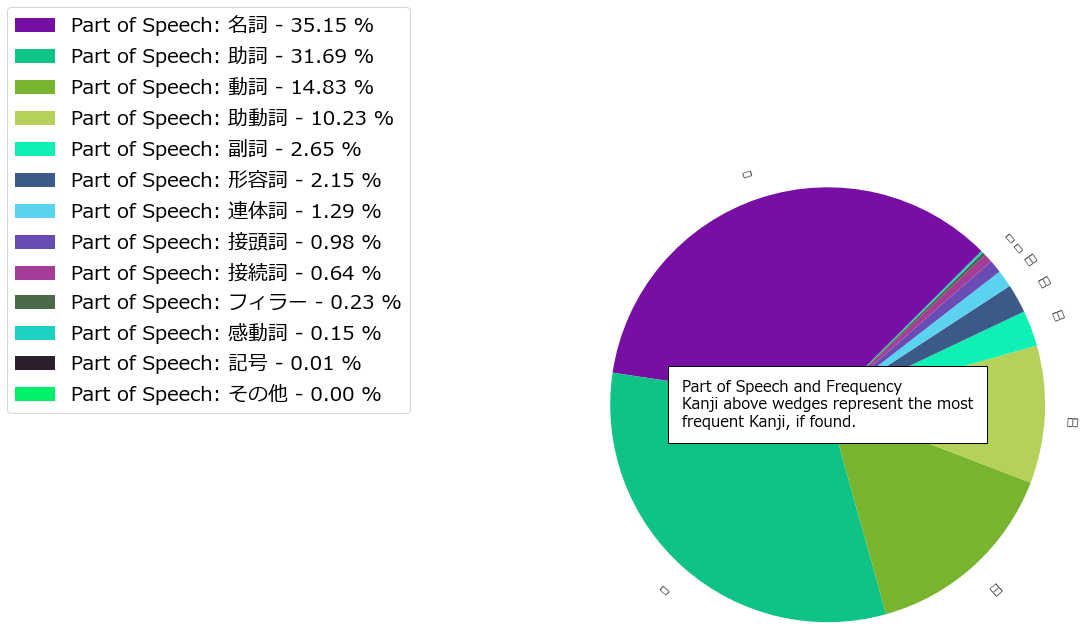

In [33]:
###EMPHASIZING KANJI
r = lambda:random.randrange(0,255,15)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(combo_pos_df["Most Common Kanji Token"].size)]

fig, ax = plt.subplots(figsize=(10,5))

x_labs = ["Part of Speech: {}".format(k) for k,v in fx.items()]
y_labs = np.array([v for k,v in fx.items()])

chars = []
for k,v in fx_chars.items():
    if(k > 0.4):
        chars.append(v)
    else: 
        chars.append("")
    
porcent = 100.*y_labs/y_labs.sum() #array of percents

patches, texts = plt.pie(y_labs,labels = chars, colors = my_colors,startangle=45,
                        radius = 2, rotatelabels=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_labs, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y_labs),
                                          key=lambda x_labs: x_labs[2],
                                          reverse=True))

plt.rc('font', family='Meiryo',size=15)

at = AnchoredText("Part of Speech and Frequency\nKanji above wedges represent the most\nfrequent Kanji, if found.",loc="center")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)
plt.legend(patches, labels, loc='best',bbox_to_anchor = (-1,2),fontsize=20)
plt.savefig("100-Authors-POS-Pie-Kanji.png")

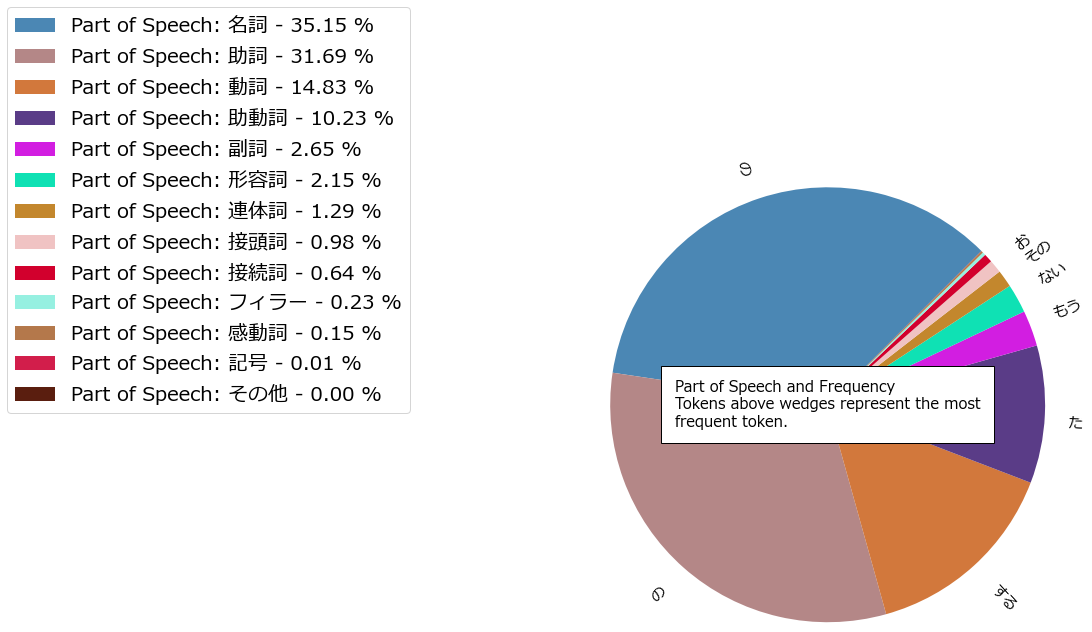

In [34]:
###NOT EMPHASIZING KANJI
r = lambda:random.randrange(0,255,15)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(combo_pos_df["Most Common Token"].size)]

fig, ax = plt.subplots(figsize=(10,5))

x_labs = ["Part of Speech: {}".format(k) for k,v in fx.items()]
y_labs = np.array([v for k,v in fx.items()])

chars = []
for k,v in fx_chars_nonkanji.items():
    if(k > 0.8):
        chars.append(v)
    else: 
        chars.append("")
    
porcent = 100.*y_labs/y_labs.sum() #array of percents

patches, texts = plt.pie(y_labs,labels = chars, colors = my_colors,startangle=45,
                        radius = 2, rotatelabels=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_labs, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y_labs),
                                          key=lambda x_labs: x_labs[2],
                                          reverse=True))

plt.rc('font', family='Meiryo',size=15)

at = AnchoredText("Part of Speech and Frequency\nTokens above wedges represent the most\nfrequent token.",loc="center")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)
plt.legend(patches, labels, loc='best',bbox_to_anchor = (-1,2),fontsize=20)
plt.savefig("100-Authors-POS-Pie.png")

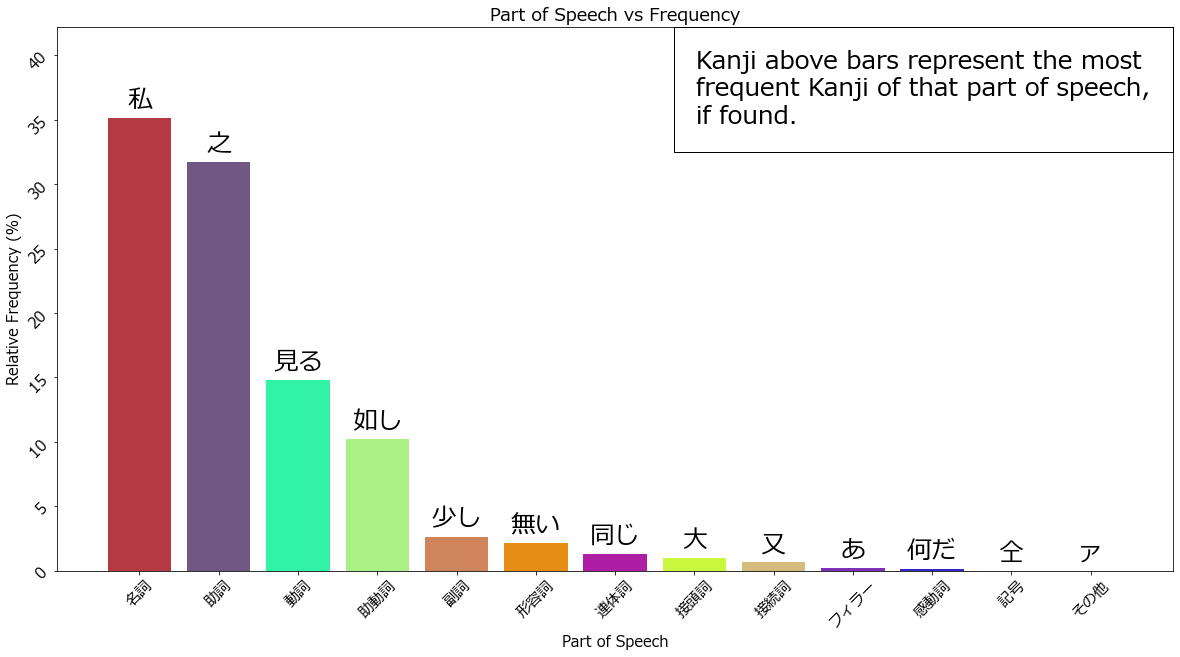

In [35]:
r = lambda:random.randint(0,255)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(combo_pos_df["Most Common Kanji Token"].size)]

x = combo_pos_df["pos"]
y = combo_pos_df["Relative Frequency"]

fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(x = x,height = y,color = my_colors,width = 0.8,tick_label=x)
ax.tick_params(labelrotation=45)
ax.set_ylabel("Relative Frequency (%)")
ax.set_xlabel("Part of Speech")
ax.set_title("Part of Speech vs Frequency")

plt.rc('font', family='Meiryo',size=25)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(fx_chars[height]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects)


at = AnchoredText("Kanji above bars represent the most \nfrequent Kanji of that part of speech,\nif found.",loc="upper right")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)


plt.margins(0.05, 0.2)
plt.savefig("100-Authors-POS-Bar-Kanji.png")

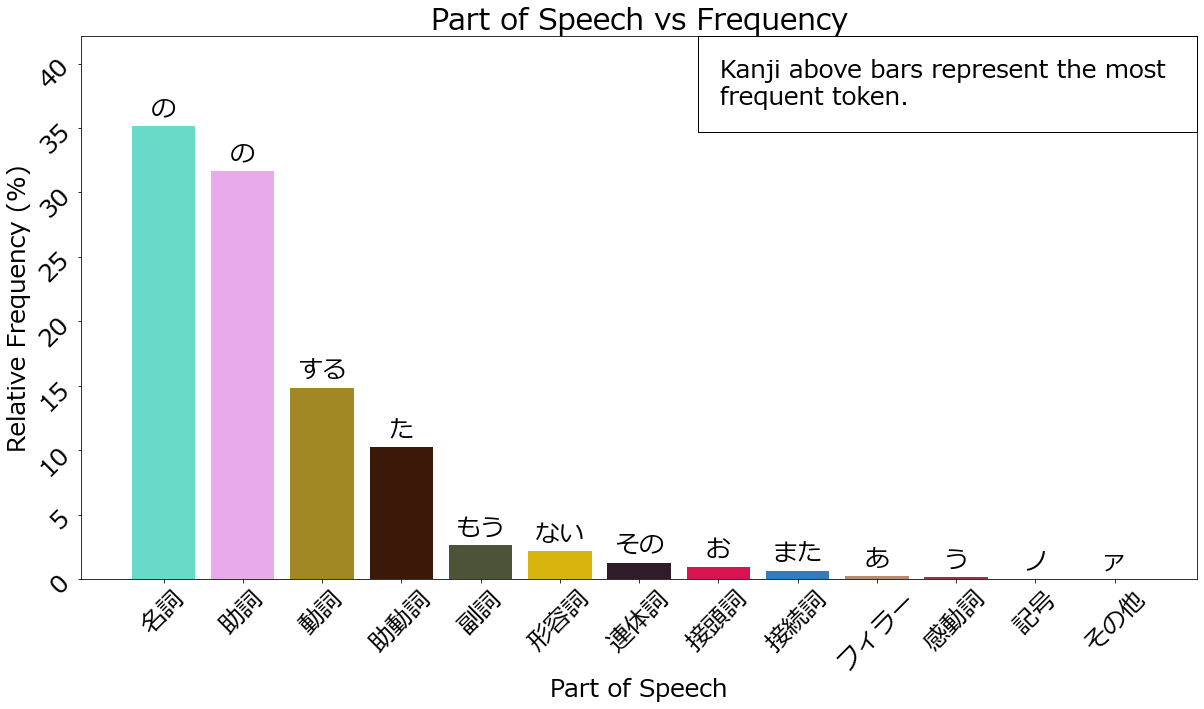

In [36]:
r = lambda:random.randint(0,255)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(combo_pos_df["Most Common Kanji Token"].size)]

x = combo_pos_df["pos"]
y = combo_pos_df["Relative Frequency"]

fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(x = x,height = y,color = my_colors,width = 0.8,tick_label=x)
ax.tick_params(labelrotation=45)
ax.set_ylabel("Relative Frequency (%)")
ax.set_xlabel("Part of Speech")
ax.set_title("Part of Speech vs Frequency")

plt.rc('font', family='Meiryo',size=25)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(fx_chars_nonkanji[height]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects)


at = AnchoredText("Kanji above bars represent the most \nfrequent token.",loc="upper right")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)


plt.margins(0.05, 0.2)
plt.savefig("100-Authors-POS-Bar.png")